## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2026


# Weekly Homework 1: Data Basics


***Goals of this homework:***
Onboard into the course (introductions and short video), perform end-to-end data analysis on a noisy real-world dataset (ingestion, cleaning, feature engineering, and exploratory data analysis), practice clear technical communication (written and spoken via short video), and answer interview-style questions that assess data reasoning, assumptions, tradeoffs, and limitations.


***Submission instructions:***

You should post your notebook to Canvas (look for the homework 1 assignment there). Please name your submission **your-uin_hw1.ipynb**, so for example, my submission would be something like **555001234_hw1.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that.

***Grading philosophy:***

We are grading reasoning, judgment, and clarity, not just correctness. Show us that you understand the data, the constraints, and the limits of your conclusions.

***For each question, you need to respond with 3 cells:***
1. **[A Code Cell] Your Code:** If code is not applicable, put `# no code` in the cell. For tests: tests can be simple assertions or checks (e.g., using `assert` or `print` or small functions or visual inspection); formal testing frameworks are not required.
2. **[A Markdown Cell] Your Answer:** Write up your answers and explain them in complete sentences. Include any videos in this section as well; for videos, upload them to your TAMU Google Drive, and ensure they are set to be visible by the instruction team (`caverlee@tamu.edu` and `mariateleki@tamu.edu`), then share the link to the video in the cell.
3. **[A Markdown Cell] Your Resources:** You need to cite 3 types of resources and note how they helped you: (1) Collaborators, (2) Web Sources (e.g. StackOverflow), and (3) AI Tools (you must also describe how you prompted, but we do not require any links to any specific chats). Specifically, use the following format as a template:
```
On my honor, I declare the following resources:
1. Collaborators:
- Sam Altman (indirectly)

2. Web Sources:
- https://docs.python.org/3.10/library/index.html (just for general python things like lower() and strip())
- https://pandas.pydata.org/docs/ (just for pandas stuff, creating a dataframe, dropping rows, apply(), etc.)

3. AI Tools:
- ChatGPT 5.2 - helped with runtime errors: read_csv not working because of extra columns in some rows, data type coercion issues for latitude / longitude, wrote test cases for part 1, wrote the regex for part 3, clarified and wrote code for the contingency table problem in part 4, helped create the graphs in part 4, Part 6 code and tests were done by chatgpt 5.2 thinking, insights in 7 done by chatgpt, graphs in 8 done by chatgpt,  
I didn't really do anything special for prompting just, "how would i do this?", "how would you program this?", etc.
```
***Why do we require this cell?*** This cell is important...

1. For academic integrity, you must give credit where credit is due.

2. We want you to pay attention to how you can successfully get help to move through problems! Is there someone you work with or an AI tool that helps you learn the material better? That's great! The point of engineering is to use your tools to solve hard problems, and part of graduate school is learning about how *you* learn and solve problems best.

***A reminder: you get out of it what you put into it.***
Do your best on these homeworks, show us your creativity, and ask for help when you need it -- good luck!

# A [4pts]. Hi! Introduce Yourself

**Note:** We only need 1 markdown cell for these questions.

**Rubric**

[2pt] Complete, thoughtful response.

[1pt] Partial response.

[0pt] Minimal response.


## 1.
Welcome to CSCE 676! Head to this thread -- **"Week 1: Introductions (on Canvas Discussions)"** -- in this week's module and introduce yourself. When you're done, type "done" here.

done

## 2.

I want to get to know you all! Please share a very brief (1min max) video saying hello.

What to include:

* A greeting (hello, hola, yo!, whatever)
* Please tell me how you pronounce your name
* One memorable thing -- could be your favorite meme, an interesting fact, favorite movie, etc. Just something that will help me remember -- like "Aha, Alice is that student who really loves skateboarding".

See the introduction for instructions on how to share the video.


https://youtu.be/Rj4Ul_-MIg4


# B [64pts]. UFO Sightings — Data Ingestion, Cleaning, and Feature Engineering

**Dataset:** `ufos.csv`

Detected columns: `datetime`, `city`, `state`, `country`, `shape`, `duration (seconds)`, `duration (hours/min)`, `comments`, `date posted`, `latitude`, `longitude`, and possibly extra unnamed columns.

**Goal:** Perform a set of tasks to load the data, diagnose issues, clean/standardize it, and derive basic features to support downstream mining using the Python package `pandas`.

**Rubric**

[8 pts] Strong/Professional: Correct and complete implementation of the task; Reasonable assumptions, stated or implied, and justified; Thoughtful handling of real-world data issues (missingness, noise, scale, duplicates, edge cases); Clear, concise explanations of what was done and why; Code is clean, readable, and well-structured, uses appropriate pandas, and would plausibly pass a professional code review; Tests meaningfully validate non-trivial behavior (not just "the code runs so it must be right").

[4 pts] Partial/Developing: Core task mostly completed but with gaps, weak assumptions, or minor mistakes; Reasoning is shallow or mostly descriptive; Code works but is messy, repetitive, or fragile; Tests are superficial, incomplete, or poorly motivated.

[0 pts] Minimal/Incorrect: Task is largely incorrect, missing, or misunderstands the goal; Little to no reasoning or justification; Code does not run or ignores constraints; No meaningful tests.


## 1.

* Load `ufos.csv` into a pd.DataFrame named `ufo_raw`.
* Display 5 random rows and `ufo_raw.info()`.
* Display the number of rows/columns.
* Display any empty columns.
* Write at least 1 test for your code, then answer: What did you test for? How do you know your code is correct?


In [1]:
import pandas as pd
ufo_raw = pd.read_csv("ufos.csv", usecols=range(11)) #chatgpt suggested the usecols to avoid parsing errors

/tmp/job.280502/ipykernel_648667/2814998710.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_raw = pd.read_csv("ufos.csv", usecols=range(11)) #chatgpt suggested the usecols to avoid parsing errors


In [2]:
ufo_raw.sample(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
24745,1/24/2007 20:00,greenville,sc,us,light,10,5-10 seconds,A Bright COlor Changing Light over Southern NC...,2/1/2007,34.8525000,-82.394167
23305,12/28/2005 23:30,schoharie,ny,us,egg,60,1 minute,Egg shaped vessel lit by some means not of thi...,2/14/2006,42.6658333,-74.310000
39670,4/10/2010 21:05,courtown (ireland),NaN,NaN,oval,120,2 min,beaming orange light over county wexford ireland,4/13/2010,52.644862,-6.228617
45100,4/7/2004 14:00,columbia falls,mt,us,light,240,3-4 minutes,A stationary light grew in brightness and then...,4/9/2004,48.3725000,-114.180556
18985,12/11/2006 01:32,riga,mi,us,other,600,ten minutes,We saw pyramid shaped objects in the sky.,12/14/2006,41.8091667,-83.825000


In [3]:
ufo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88875 entries, 0 to 88874
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88875 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81356 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88873 non-null  object 
 6   duration (hours/min)  85772 non-null  object 
 7   comments              88749 non-null  object 
 8   date posted           88875 non-null  object 
 9   latitude              88875 non-null  object 
 10  longitude             88875 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.5+ MB


In [4]:
#number of cols and rows already displayed with .info()

In [5]:
def find_empty_columns(df):
    return df.columns[df.isna().all()].tolist()
empty_cols = find_empty_columns(ufo_raw)
print(empty_cols) #no empty cols

[]


In [6]:
def test_find_empty_columns():
    df = pd.DataFrame({
        "a": [1, 2, 3],
        "b": [None, None, None],
        "c": [None, 5, None],
    })
    empty_cols = find_empty_columns(df)
    assert empty_cols == ["b"]

test_find_empty_columns()
#tests that find_empty_columns() logic is correct, in the test case only column "b" is empty


## 2.

Create a cleaned DataFrame `ufo`:

* Drop fully-empty or irrelevant columns (e.g., unnamed columns).
* Parse `datetime` to `datetime64[ns]` (`errors='coerce'`).
* Coerce `duration (seconds)`, `latitude`, `longitude` to numeric.
* Lowercase/trim `city`, `state`, `country`, `shape`.
* Remove rows with impossible coordinates (lat ∉ [-90,90], lon ∉ [-180,180]).
* Drop exact duplicates based on a reasonable subset (document your choice).
* Write at least 2 tests for your code (focus on the most complicated parts), then answer: What did you test for? How do you know your code is correct?


In [7]:
print(ufo_raw.columns)

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')


In [8]:
#unnamed columns were already removed, pandas wouldn't let me read the csv with unnamed column
empty_cols = ufo_raw.columns[ufo_raw.isna().all()]
print(empty_cols.tolist()) #no empty cols


[]


In [9]:
ufo_raw["datetime"] = pd.to_datetime(ufo_raw["datetime"], errors="coerce")

In [10]:
trim_cols = ["city", "state", "country", "shape"]
def stripper(s : str):
    return s.strip()
def lower(s: str):
    return s.lower()
for col in trim_cols:
    ufo_raw[col] = ufo_raw[col].astype(str)
    ufo_raw[col] = ufo_raw[col].apply(stripper)
    ufo_raw[col] = ufo_raw[col].apply(lower)

In [11]:
def valid_lat(latitude : float):
    return (latitude <= 90) & (latitude >= -90)
def valid_long(longitude : float):
    return (longitude <= 180) & (longitude >= -180)
def valid_location(ufo_df):
    return (valid_lat(ufo_df["latitude"])) & (valid_long(ufo_df["longitude"]))

ufo_raw["latitude"]  = pd.to_numeric(ufo_raw["latitude"], errors="coerce")
ufo_raw["longitude"] = pd.to_numeric(ufo_raw["longitude"], errors="coerce")
ufo_raw = ufo_raw.dropna(subset=['latitude', 'longitude'])
ufo_raw = ufo_raw.loc[valid_location(ufo_raw)]


In [12]:
#I chose to drop any row where latitude, longitude, and datetime match. I don't think it makes sense for more than one sighting at the same place and time
ufo_raw = ufo_raw.drop_duplicates(subset=["latitude", "longitude", "datetime"])
ufo_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87180 entries, 0 to 88874
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              86223 non-null  datetime64[ns]
 1   city                  87180 non-null  object        
 2   state                 87180 non-null  object        
 3   country               87180 non-null  object        
 4   shape                 87180 non-null  object        
 5   duration (seconds)    87178 non-null  object        
 6   duration (hours/min)  84287 non-null  object        
 7   comments              87147 non-null  object        
 8   date posted           87180 non-null  object        
 9   latitude              87180 non-null  float64       
 10  longitude             87180 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 8.0+ MB


In [13]:
import pandas.testing as pdt

#test datetime coercion logic
def test_datetime_parsing_coerces_invalid_to_nat():
    # Arrange: mixed valid + invalid datetime strings
    ufo_raw = pd.DataFrame(
        {
            "datetime": ["2020-01-01 12:34:56", "not a date", "", None],
            "latitude": [0, 0, 0, 0],
            "longitude": [0, 0, 0, 0],
        }
    )

    # Act: your datetime line
    ufo_raw["datetime"] = pd.to_datetime(ufo_raw["datetime"], errors="coerce")

    # Assert: dtype is datetime64[ns]
    assert pd.api.types.is_datetime64_ns_dtype(ufo_raw["datetime"])

    # Assert: invalid values became NaT, valid parsed correctly
    assert ufo_raw.loc[0, "datetime"] == pd.Timestamp("2020-01-01 12:34:56")
    assert pd.isna(ufo_raw.loc[1, "datetime"])
    assert pd.isna(ufo_raw.loc[2, "datetime"])
    assert pd.isna(ufo_raw.loc[3, "datetime"])

#test lat/long logic
def test_location_cleaning_coerces_and_filters_bounds_and_nonnumeric():
    # Arrange: lat/lon as strings, with nonnumeric and out-of-range values
    ufo_raw = pd.DataFrame(
        {
            "datetime": ["2020-01-01"] * 6,
            "latitude": ["45", "91", "0", "abc", "-90", "90"],
            "longitude": ["120", "0", "-181", "10", "180", "-180"],
        }
    )

    # Act: your numeric coercion + dropna + bounds filter
    ufo_raw["latitude"] = pd.to_numeric(ufo_raw["latitude"], errors="coerce")
    ufo_raw["longitude"] = pd.to_numeric(ufo_raw["longitude"], errors="coerce")
    ufo_raw = ufo_raw.dropna(subset=["latitude", "longitude"])
    ufo_raw = ufo_raw.loc[valid_location(ufo_raw)]

    # Assert: only rows with valid numeric coords in range remain
    # Expected to keep:
    #  - (45, 120)
    #  - (-90, 180)  boundary valid
    #  - (90, -180)  boundary valid
    expected = pd.DataFrame(
        {
            "datetime": ["2020-01-01"] * 3,
            "latitude": [45.0, -90.0, 90.0],
            "longitude": [120.0, 180.0, -180.0],
        }
    )

    # Reset index because filtering preserves original indices
    ufo_raw = ufo_raw.reset_index(drop=True)
    expected = expected.reset_index(drop=True)

    # Check exact equality (including dtypes)
    pdt.assert_frame_equal(ufo_raw, expected, check_dtype=False)


test_datetime_parsing_coerces_invalid_to_nat()
test_location_cleaning_coerces_and_filters_bounds_and_nonnumeric()

My code is likely correct since the above test cases passed, the first case tests the datetime coercion and correctly makes the invalid datetimes NA while convertingg the correctly formatted datetimes to a datetime object  
The second test ensures that the valid lat/long logic is correct by asserting that the dataframe after valid_location application correctly identifies valid lat/long entries.

## 3.

Now take a look at the `duration (hours/min)` column. For this question, we'd like you to just extract how ever many unique versions of durations reported in *minutes* you can from the `duration (hours/min)` column. In other words, find as many different variations of anything that could be reasonably interpreted as a minute-like duration. Examples include:
* several minutes
* x to y minutes
* x minutes
* x min.
* x mins.
* and so on ...

Write at least 2 tests for your code (focus on the most complicated parts), then answer: What did you test for? How do you know your code is correct?

In [14]:
#code for discovering formats (generated by chatgpt 5.2)
import re
from collections import defaultdict
from typing import Iterable, Dict, List, Tuple

# --- Patterns to FIND minute-like substrings (spans) ---
NUM = r"(?:\d+(?:\.\d+)?)"  # 2, 2.5
RANGE_SEP = r"(?:-|–|to|through|thru)"
UNIT = r"(?:min|mins|minute|minutes|min\.)"  # add/remove based on your data

# Find numeric minute expressions like:
#   5 min, 5 mins., 5 minutes
#   5-10 min, 5–10 mins, 5 to 10 minutes
NUMERIC_MIN_SPAN_RE = re.compile(
    rf"""
    (?P<span>
        \b{NUM}\b
        (?:\s*{RANGE_SEP}\s*\b{NUM}\b)?   # optional second number for range
        \s*
        \b{UNIT}\b
    )
    """,
    re.IGNORECASE | re.VERBOSE,
)

# Find fuzzy minute expressions like:
#   several minutes, a few minutes, couple of minutes
FUZZY_WORDS = r"(?:a\s+few|few|several|couple(?:\s+of)?|some)"
FUZZY_MIN_SPAN_RE = re.compile(
    rf"(?P<span>\b{FUZZY_WORDS}\s+minutes?\b)",
    re.IGNORECASE,
)

# Optional: qualifiers like "about", "approx", "~" that often precede minute spans
QUALIFIER_WORD_RE = re.compile(r"(?:\b(?:about|approx(?:\.|imately)?|around|ca\.?|c\.?)\b)", re.IGNORECASE)
QUALIFIER_SYMBOL_RE = re.compile(r"(?:~)")

# --- Normalization helpers ---
def _collapse_ws(s: str) -> str:
    return re.sub(r"\s+", " ", s.strip())

def _normalize_dash(s: str) -> str:
    return s.replace("–", "-")

def _normalize_unit(s: str) -> str:
    # normalize unit spellings/punctuation to a canonical token for format detection
    # "min." -> "min", "mins" -> "mins", "minutes" -> "minutes"
    s = re.sub(r"\bmin\.\b", "min", s, flags=re.IGNORECASE)
    return s

def normalize_span(span: str) -> str:
    span = _collapse_ws(span)
    span = _normalize_dash(span)
    span = _normalize_unit(span)
    # normalize spacing around hyphen in ranges: "5 - 10" -> "5-10"
    span = re.sub(r"\s*-\s*", "-", span)
    # normalize "to" spacing: "5  to 10" -> "5 to 10"
    span = re.sub(r"\s+\bto\b\s+", " to ", span, flags=re.IGNORECASE)
    return span


# --- FORMAT SIGNATURE builder ---
NUM_RE = re.compile(r"\b\d+(?:\.\d+)?\b")
RANGE_RE = re.compile(rf"\b{NUM}\b\s*(?:-|–)\s*\b{NUM}\b|\b{NUM}\b\s+\bto\b\s+\b{NUM}\b", re.IGNORECASE)

def span_to_signature(span: str) -> str:
    """
    Convert a specific minute-span text into a generalized "format signature".
    Examples:
      "5 minutes"        -> "{N} minutes"
      "5-10 min"         -> "{N}-{N} min"
      "5 to 10 minutes"  -> "{N} to {N} minutes"
      "several minutes"  -> "{WORD} minutes"
    """
    s = normalize_span(span)

    # Handle fuzzy words (several/few/couple of)
    if FUZZY_MIN_SPAN_RE.search(s):
        # Keep "couple of" as WORD token too
        # Signature should preserve singular/plural unit if present.
        unit = "minutes" if re.search(r"\bminutes\b", s, re.IGNORECASE) else "minute"
        return "{WORD} " + unit

    # Replace numeric ranges first (so "5-10" becomes "{N}-{N}" not "{N}-{N}" via two singles)
    s2 = s
    s2 = re.sub(rf"\b{NUM}\b-\b{NUM}\b", "{N}-{N}", s2, flags=re.IGNORECASE)
    s2 = re.sub(rf"\b{NUM}\b\s+\bto\b\s+\b{NUM}\b", "{N} to {N}", s2, flags=re.IGNORECASE)

    # Replace remaining standalone numbers
    s2 = NUM_RE.sub("{N}", s2)

    # Canonicalize units to one of: min / mins / minute / minutes
    # (We *keep* the unit token because different unit spellings are “different formats”.)
    s2 = re.sub(r"\bmin\b", "min", s2, flags=re.IGNORECASE)
    s2 = re.sub(r"\bmins\b", "mins", s2, flags=re.IGNORECASE)
    s2 = re.sub(r"\bminute\b", "minute", s2, flags=re.IGNORECASE)
    s2 = re.sub(r"\bminutes\b", "minutes", s2, flags=re.IGNORECASE)

    return _collapse_ws(s2)


def discover_minute_formats(values: Iterable[str], include_qualifiers: bool = True) -> Dict[str, List[str]]:
    """
    Returns a dict:
      signature -> list of example spans (unique, capped for readability).
    """
    formats: Dict[str, List[str]] = defaultdict(list)
    seen_example: Dict[Tuple[str, str], bool] = {}

    for raw in values:
        if raw is None:
            continue
        text = str(raw)

        spans: List[str] = []

        # Find numeric spans
        spans += [m.group("span") for m in NUMERIC_MIN_SPAN_RE.finditer(text)]

        # Find fuzzy spans
        spans += [m.group("span") for m in FUZZY_MIN_SPAN_RE.finditer(text)]

        # Optionally capture immediate qualifier + span as a distinct format (e.g., "about {N} mins")
        for span in spans:
            clean_span = normalize_span(span)
            sig = span_to_signature(clean_span)
            _add_example(formats, seen_example, sig, clean_span)

            if include_qualifiers:
                # If a qualifier appears within a few chars before the span, incorporate it
                # (simple heuristic: check the 15 chars before the span start)
                idx = text.lower().find(span.lower())
                if idx != -1:
                    prefix_window = text[max(0, idx - 15): idx]

                    qword = None
                    m_sym = QUALIFIER_SYMBOL_RE.search(prefix_window)
                    if m_sym:
                        qword = m_sym.group(0)
                    else:
                        m_word = QUALIFIER_WORD_RE.search(prefix_window)
                        if m_word:
                            qword = m_word.group(0).lower()
                    
                    if qword:
                        sig2 = f"{qword} {sig}"
                        example2 = f"{qword} {clean_span}"
                        _add_example(formats, seen_example, sig2, example2)

    # convert defaultdict to normal dict
    return dict(formats)


def _add_example(formats, seen_example, sig: str, example: str, cap: int = 5) -> None:
    key = (sig, example)
    if key in seen_example:
        return
    seen_example[key] = True
    if len(formats[sig]) < cap:
        formats[sig].append(example)


In [15]:
formats = discover_minute_formats(ufo_raw["duration (hours/min)"])
for sig, examples in sorted(formats.items()):
    print(sig, "->", examples)

about {N} min -> ['about 45 min', 'about 5 min', 'about 20 min', 'about 10 min', 'about 1 min']
about {N} mins -> ['about 3 mins', 'about 12 mins', 'about 20 mins', 'about 10 mins', 'about 30 mins']
about {N} minute -> ['about 1 minute', 'about 20 minute']
about {N} minutes -> ['about 15 minutes', 'about 30 minutes', 'about 10 minutes', 'about 5 minutes', 'about 2 minutes']
about {N} to {N} mins -> ['about 10 to 12 mins']
about {N} to {N} minutes -> ['about 1 to 2 minutes', 'about 10 to 15 minutes', 'about 5 to 10 minutes']
about {N}-{N} min -> ['about 5-7 min', 'about 10-15 min', 'about 2-3 min', 'about 3-5 min', 'about 7-10 min']
about {N}-{N} mins -> ['about 2-4 mins', 'about 5-10 mins']
about {N}-{N} minutes -> ['about 2-3 minutes', 'about 3-4 minutes', 'about 6-7 minutes', 'about 15-20 minutes', 'about 20-30 minutes']
about {WORD} minutes -> ['about a few minutes']
approx {N} min -> ['approx 5 min', 'approx 15 min', 'approx 7 min', 'approx 2 min', 'approx 1 min']
approx {N} mins -

In [16]:
import pytest


def test_discovers_range_formats_across_separators_and_units():
    """
    Most important: we correctly discover distinct *format signatures* for ranges,
    even when separators and unit spellings vary, and we don't lose the range structure.
    """
    col = [
        "Wait time: 10–15 min.",          # en dash + min.
        "processing took 10-15 mins",     # hyphen + mins
        "duration: 10 to 15 minutes",     # 'to' + minutes
        "ignore: 2 hours",                # should not create minute formats
    ]

    fmts = discover_minute_formats(col)

    # Range with dash (en-dash/hyphen normalized to "-")
    assert "{N}-{N} min" in fmts or "{N}-{N} mins" in fmts, fmts

    # Range with 'to' should remain 'to' (not collapse into dash)
    assert "{N} to {N} minutes" in fmts, fmts

    # Ensure we didn't accidentally treat "2 hours" as minutes
    assert all("hour" not in sig for sig in fmts.keys())


def test_discovers_qualified_numeric_minutes_and_fuzzy_minutes():
    """
    Most important: we discover (a) fuzzy minute phrases and (b) qualifier-prefixed numeric minutes
    as separate signatures, and we dedupe punctuation/case variants.
    """
    col = [
        "It took SEVERAL minutes.",       # fuzzy (caps + punctuation)
        "it took several minutes",        # same fuzzy again (should not create a second fuzzy signature)
        "about 7 mins to complete",       # qualifier + numeric + mins
        "~ 3 min remaining",              # qualifier '~' + numeric + min
    ]

    fmts = discover_minute_formats(col, include_qualifiers=True)

    # Fuzzy signature
    assert "{WORD} minutes" in fmts, fmts

    # Qualified numeric signatures should exist as their own discovered formats
    assert "about {N} mins" in fmts, fmts
    assert "~ {N} min" in fmts, fmts

    # Dedup check: we should have exactly one fuzzy signature, not multiple due to case/punctuation
    fuzzy_sigs = [sig for sig in fmts.keys() if "{WORD}" in sig]
    assert fuzzy_sigs == ["{WORD} minutes"], fuzzy_sigs

test_discovers_range_formats_across_separators_and_units()
test_discovers_qualified_numeric_minutes_and_fuzzy_minutes()

The first test ensures that we are correctly identifying ranges when given.  
The second test ensures that we are correctly fuzzy matching phrases, e.g ignoring capitalization and trailing punctuation.  
I know my code is correct because the test cases pass


## 4.

Create additional columns in a new feature engineering version of the dataset called `ufo_fe`:

- `year`, `month`, `hour` from `datetime`
- `duration_log10` = log10(duration_seconds + 1)
- `duration_bucket` = categorical bins for `duration (seconds)` (you may adjust edges)
- `us_only` = 1 if `country == 'us'` else 0

Then produce:
- Value counts of `shape` (top 10).
- A table of sightings by `year` (counts).
- A `state × shape` table (top 10 states by sample size).
- A matplotlib or seaborn visualization of the top 10 states by number of UFO sightings. Write about which visualization you selected, and why.
- Write at least 2 tests for your code (focus on the most complicated parts), then answer: What did you test for? How do you know your code is correct?




In [17]:
from pandas import DataFrame
def get_year(date):
    return date.year
def get_month(date):
    return date.month
def get_hour(date):
    return date.hour
#not sure why creating an entirely new dataframe is necessary
ufo_fe = DataFrame.copy(ufo_raw)
ufo_fe["year"] = ufo_raw["datetime"].apply(get_year)
ufo_fe["month"] = ufo_raw["datetime"].apply(get_month)
ufo_fe["hour"] = ufo_raw["datetime"].apply(get_hour)

In [18]:
import math
def log10_func(seconds):
    return math.log10(seconds + 1)
    
ufo_fe["duration (seconds)"] = pd.to_numeric(ufo_raw["duration (seconds)"], errors="coerce")

ufo_fe["duration_log10"] = ufo_fe["duration (seconds)"].apply(log10_func)


In [19]:
#quantile based categories should be sufficient
ufo_fe["duration_bucket"] = pd.qcut(
    ufo_fe["duration (seconds)"],
    q=4,
    labels=[0, 1, 2, 3]
)


In [20]:
def us_function(country):
    if(country == "us"):
        return 1
    return 0
ufo_fe["us_only"] = ufo_fe["country"].apply(us_function)

In [21]:
shape_counts = ufo_fe["shape"].value_counts()
print(shape_counts[:10])

shape
light       17588
circle       8367
triangle     8324
fireball     6471
unknown      6208
other        6145
disk         5886
sphere       5651
oval         4021
nan          2815
Name: count, dtype: int64


In [22]:
pd.set_option("display.max_rows", 100)
year_counts = ufo_fe["year"].value_counts()
print(year_counts)

year
2012.0    7746
2013.0    7432
2011.0    5419
2008.0    5086
2009.0    4820
2010.0    4590
2007.0    4578
2004.0    4516
2005.0    4325
2003.0    4277
2006.0    3993
2002.0    3532
2001.0    3377
1999.0    3051
2000.0    2966
2014.0    2440
1998.0    1939
1995.0    1362
1997.0    1345
1996.0     937
1994.0     458
1978.0     369
1993.0     345
1975.0     336
1976.0     303
1974.0     293
1977.0     289
1990.0     285
1979.0     275
1992.0     275
1989.0     270
1980.0     267
1988.0     259
1991.0     259
1987.0     245
1973.0     238
1985.0     235
1968.0     228
1986.0     213
1966.0     211
1967.0     211
1982.0     201
1984.0     200
1965.0     195
1981.0     193
1972.0     190
1969.0     177
1983.0     174
1970.0     162
1971.0     137
1964.0     101
1963.0      89
1962.0      78
1957.0      78
1960.0      71
1959.0      59
1954.0      56
1961.0      53
1958.0      50
1952.0      49
1956.0      48
1947.0      39
1953.0      36
1955.0      36
1950.0      29
1951.0      25
1949.

In [38]:
ufo_us_only = ufo_fe.loc[ufo_fe["us_only"] == 1]
#any rows where state == nan with us_only don't make sense, could use lat / long to determine state, but this is too much for geopy which 
#has a rate limit of 1 request per second
ufo_us_only = ufo_us_only.loc[ufo_fe["state"] != "nan"]
pd.set_option("display.max_columns", 100)

top_states = ufo_fe["state"].value_counts().head(10).index

table = pd.crosstab(
    ufo_us_only.loc[ufo_us_only["state"].isin(top_states), "state"],
    ufo_us_only.loc[ufo_us_only["state"].isin(top_states), "shape"]
)

table

shape,changing,chevron,cigar,circle,cone,cross,cylinder,delta,diamond,disk,egg,fireball,flare,flash,formation,hexagon,light,nan,other,oval,rectangle,round,sphere,teardrop,triangle,unknown
state,,,,,,,,,,,,,,,,,,,,,,,,,,
az,74,27,51,225,15,8,38,0,29,137,19,183,0,41,100,0,575,74,200,109,35,0,170,24,233,174
ca,294,156,206,905,32,33,129,0,143,670,92,720,1,153,306,0,1907,306,655,401,152,1,633,77,848,607
fl,111,51,89,386,14,12,59,0,61,233,40,427,0,64,116,0,783,114,278,200,69,0,276,37,372,299
il,55,27,58,272,7,5,35,0,33,166,31,212,0,39,89,0,489,68,158,122,41,0,146,19,309,162
mi,34,9,42,159,10,2,27,0,30,146,16,178,0,28,60,0,385,82,120,80,35,0,116,20,234,143
ny,73,44,84,330,11,17,44,0,51,235,43,229,0,58,89,0,597,80,217,168,52,0,185,39,312,203
oh,56,18,62,250,18,9,41,0,38,154,23,226,0,35,78,0,460,36,145,116,36,0,182,19,266,160
pa,45,17,72,249,15,4,36,0,31,169,24,219,0,32,84,1,490,61,164,133,41,1,149,23,234,195
tx,104,55,108,313,10,8,65,1,51,246,31,211,0,67,104,0,745,67,297,201,68,0,215,40,374,300


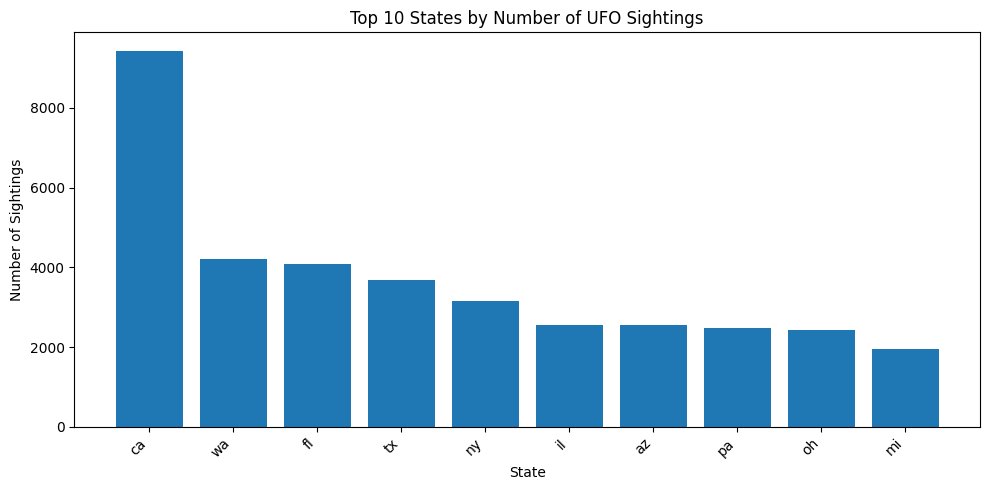

In [39]:
import matplotlib.pyplot as plt
#redefine top states to the value_counts() instead of index
top_states = ufo_us_only["state"].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_states.index, top_states.values)
plt.title("Top 10 States by Number of UFO Sightings")
plt.xlabel("State")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

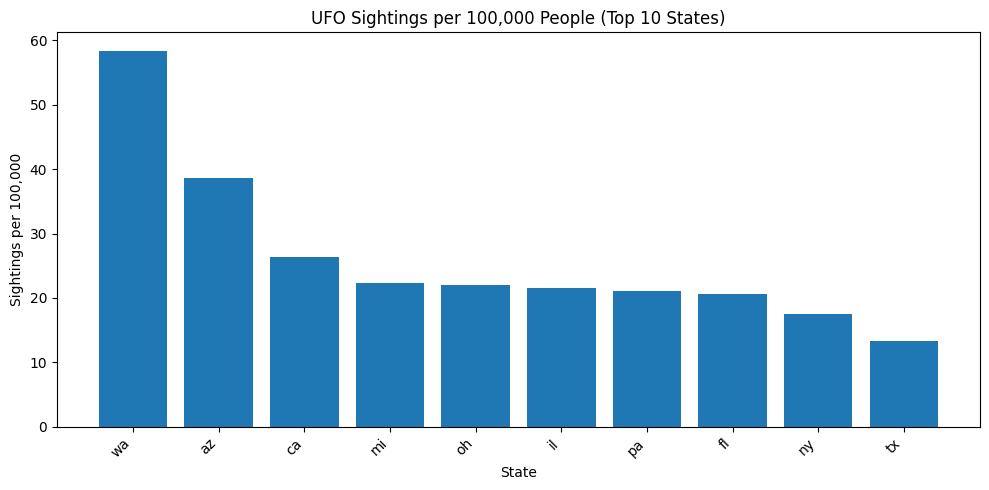

In [40]:
#I'm going to normalize by population because I think that's more interesting
import pandas as pd
import matplotlib.pyplot as plt

top_states = ["ca", "wa", "oh", "mi", "fl", "tx", "ny", "az", "pa", "il"]

# Example populations (approx recent US estimates). Replace if you have official values.
pop = {
    "ca": 39_000_000,
    "wa": 7_800_000,
    "oh": 11_800_000,
    "mi": 10_000_000,
    "fl": 22_000_000,
    "tx": 30_000_000,
    "ny": 19_600_000,
    "az": 7_400_000,
    "pa": 13_000_000,
    "il": 12_600_000,
}

# count sightings in those states
counts = ufo_fe["state"].value_counts().reindex(top_states)

# compute sightings per 100k
per_100k = (counts / pd.Series(pop)) * 100_000
per_100k = per_100k.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(per_100k.index, per_100k.values)
plt.title("UFO Sightings per 100,000 People (Top 10 States)")
plt.xlabel("State")
plt.ylabel("Sightings per 100,000")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


I used MatPlotLib because I am most familiar with MatPlotLib, that is the only reason

In [37]:
# Test 1: test that years, months, hour are valid
invalid_years_df = ufo_fe.loc[ufo_fe["year"] >= 2027]
invalid_months_df = ufo_fe.loc[(ufo_fe["month"] > 12) | (ufo_fe["month"] < 1)]
invalid_hours_df = ufo_fe.loc[(ufo_fe["hour"] > 23) | (ufo_fe["hour"] < 0)]
failed = False
if(invalid_years_df.shape[0] != 0):
    failed = True
    print("there were invalid years!")
if(invalid_months_df.shape[0] != 0):
    failed = True
    print("there were invalid months!")
if(invalid_hours_df.shape[0] != 0):
    failed = True
    print("there were invalid hours!")
if(not failed):
    print("Success!")

Success!


In [41]:
# Test 2: Ensure that us_only is either 0 or 1
us_only_unique_values = ufo_fe["us_only"].unique()
if(len(us_only_unique_values) != 2):
    print("test failed, us_only has", len(us_only_unique_values), "unique values")
elif(not ((0 in us_only_unique_values) and (1 in us_only_unique_values))):
    print("test failed, us_only contained values", us_only_unique_values)
else:
    print("Success!")
    

Success!


I tested for valid years, months, and hours as well as valid us_only values. This ensures that our transformations to create the ufo_fe dataframe were correct.  
I know that my code is correct because it correctly transformed the datetime to valid days, months, and hours, and was also able to convert the country column to valid us_only values.


## 5.

In 3–6 sentences, based on your previous answers, summarize data quality and distributional patterns; use at least 3 facts about the dataset produced by your analysis in the previous questions.


Based solely on previous answers, we have data where:  
1. There were several rows of data where an extra column was inserted. This indicates the data quality is very poor, if this data was pulled from an automated data storage system, like a SQL database, then it would not make sense for there to be extra columns for some rows and not others (SQL would not allow this nonsense). This points to the data being manually collected and recorded, and this is not a good way to collect / store data since people make mistakes.
2. There were many different formats for the duration (hours / minutes) again indicating poor data quality since it was manually collected / entered. This also makes it very painful for analysis since you have to identify all of the different possible regex patterns used by reporters to report the duration
3. In general, the data is quite skewed. The sighting frequency tends to skew towards years that are closer to the present, and California has the largest number of sightings by a large margin (about double the number of sightings that the next contender, Washington, has). Although when we adjust for population size, Washington has the highest number of sightings per capita, again by a pretty wide margin. I think it's also interesting that the two states with the highest sighting frequencies are located on the west coast. 

# 6.
* In a new chat, prompt an AI tool to perform an EDA on the dataset for you, e.g., *Here is my dataset (attached). Give python code for a basic EDA.* Paste and run the code here (re-prompt until it gives reasonable output if there are bugs/failures).
* Write at least 2 tests for your code (focus on the most complicated parts), then answer: What did you test for? How do you know the code is correct?
* So, what did ChatGPT do for the EDA?
* Come up with 3 things it could've done instead.

In [43]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

In [44]:
df = ufo_raw.copy()

df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(r"[^\w]+", "_", regex=True)
    .str.strip("_")
)
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds', 'duration_hours_min', 'comments', 'date_posted', 'latitude',
       'longitude'],
      dtype='object')

In [45]:
audit = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "non_null": df.notna().sum(),
    "nulls": df.isna().sum(),
    "null_rate": (df.isna().mean()).round(4),
    "n_unique": df.nunique(dropna=True)
}).sort_values("null_rate", ascending=False)

audit

,dtype,non_null,nulls,null_rate,n_unique
duration_hours_min,object,84287,2893,0.0332,9685
datetime,datetime64[ns],86223,957,0.0110,75092
comments,object,87147,33,0.0004,86804
state,object,87180,0,0.0000,69
city,object,87180,0,0.0000,21934
shape,object,87180,0,0.0000,30
country,object,87180,0,0.0000,6
duration_seconds,object,87178,2,0.0000,726
date_posted,object,87180,0,0.0000,317
latitude,float64,87180,0,0.0000,19441


In [46]:
full_dupes = df.duplicated().sum()
print("Full-row duplicates:", full_dupes)

# A more meaningful "event duplicate": same datetime + city + state + shape (often repeated reports)
key_cols = [c for c in ["datetime", "city", "state", "country", "shape"] if c in df.columns]
event_dupes = df.duplicated(subset=key_cols).sum()
print("Event-key duplicates:", event_dupes)


Full-row duplicates: 0
Event-key duplicates: 0


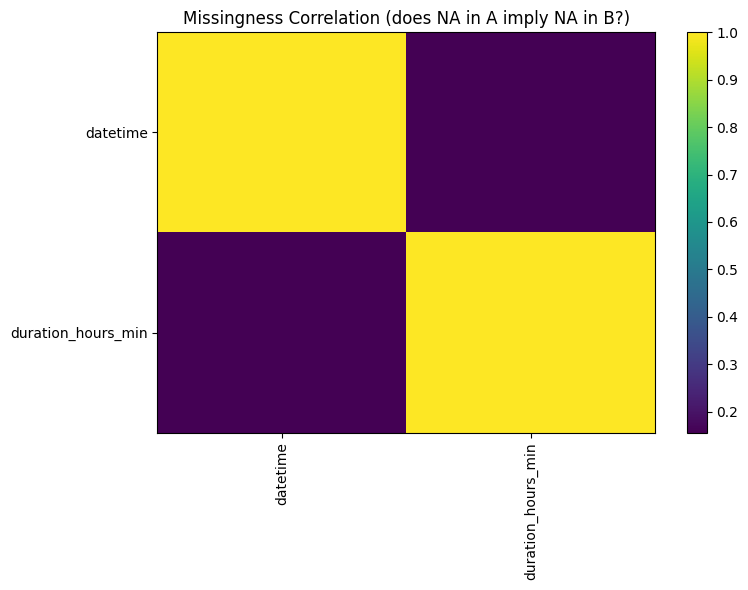

In [47]:
miss = df.isna().astype(int)

# Correlation of missingness patterns (only meaningful for columns with some missingness)
miss_cols = miss.columns[miss.mean().between(0.01, 0.99)]
if len(miss_cols) > 1:
    corr = miss[miss_cols].corr()
    plt.figure(figsize=(8,6))
    plt.imshow(corr, aspect='auto')
    plt.xticks(range(len(miss_cols)), miss_cols, rotation=90)
    plt.yticks(range(len(miss_cols)), miss_cols)
    plt.colorbar()
    plt.title("Missingness Correlation (does NA in A imply NA in B?)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough partially-missing columns for a missingness correlation plot.")


In [48]:
# Keep raw copies for debugging
df["datetime_raw"] = df["datetime"]

df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce", infer_datetime_format=True)
df["date_posted"] = pd.to_datetime(df["date_posted"], errors="coerce", infer_datetime_format=True)

print("datetime parse failure rate:", df["datetime"].isna().mean().round(4))
print("date_posted parse failure rate:", df["date_posted"].isna().mean().round(4))

# Time-derived features
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["weekday"] = df["datetime"].dt.weekday  # 0=Mon
df["is_weekend"] = df["weekday"].isin([5,6]).astype(int)


datetime parse failure rate: 0.011
date_posted parse failure rate: 0.0


/tmp/job.280502/ipykernel_648667/2667858568.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce", infer_datetime_format=True)
/tmp/job.280502/ipykernel_648667/2667858568.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date_posted"] = pd.to_datetime(df["date_posted"], errors="coerce", infer_datetime_format=True)


In [49]:
def to_float_seconds(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower().strip()
    s = s.replace(",", "")
    # extract first numeric (handles "300 seconds", "30.5", etc.)
    m = re.search(r"[-+]?\d*\.?\d+", s)
    return float(m.group()) if m else np.nan

df["duration_seconds_num"] = df["duration_seconds"].apply(to_float_seconds)

# Basic validity filters (you can justify these)
# - negative durations don't make sense
# - extremely huge values might be entry errors (keep them but flag)
df["duration_invalid"] = (df["duration_seconds_num"] < 0) | (df["duration_seconds_num"].isna())
df["duration_extreme"] = df["duration_seconds_num"] > df["duration_seconds_num"].quantile(0.999)

df["log_duration"] = np.log10(df["duration_seconds_num"].clip(lower=0.1))


In [50]:
df["latitude_num"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude_num"] = pd.to_numeric(df["longitude"], errors="coerce")

df["geo_invalid"] = (
    df["latitude_num"].isna() | df["longitude_num"].isna() |
    (df["latitude_num"].abs() > 90) | (df["longitude_num"].abs() > 180)
)

print("Invalid geo rate:", df["geo_invalid"].mean().round(4))


Invalid geo rate: 0.0


In [51]:
for c in ["city", "state", "country", "shape"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().str.lower().replace({"nan": np.nan})

# Common quick wins
df["country"] = df["country"].replace({"us": "us", "usa": "us", "united states": "us"})
df["shape"] = df["shape"].replace({"unknown": np.nan, "other": "other"})


In [52]:
shape_counts = df["shape"].value_counts(dropna=False)
print("Unique shapes:", df["shape"].nunique(dropna=True))
shape_counts.head(15)


Unique shapes: 28


shape
light        17588
NaN           9023
circle        8367
triangle      8324
fireball      6471
other         6145
disk          5886
sphere        5651
oval          4021
formation     2585
cigar         2211
changing      2119
flash         1465
rectangle     1393
cylinder      1360
Name: count, dtype: int64

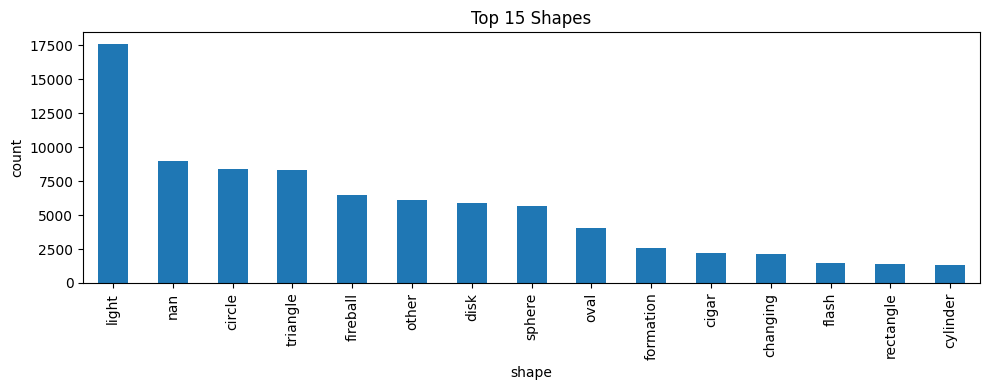

In [53]:
topn = 15
plt.figure(figsize=(10,4))
shape_counts.dropna().head(topn).plot(kind="bar")
plt.title(f"Top {topn} Shapes")
plt.ylabel("count")
plt.tight_layout()
plt.show()


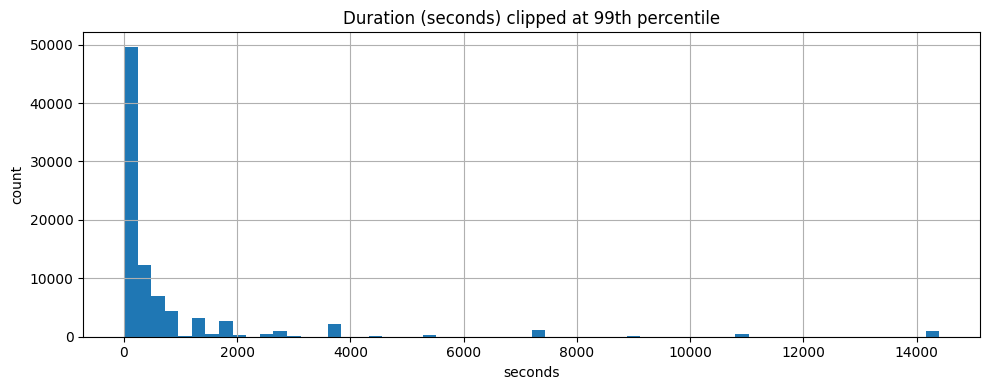

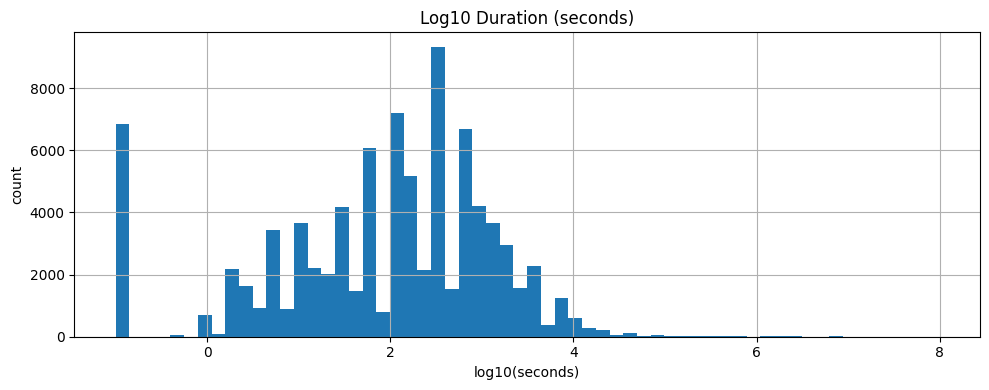

In [54]:
plt.figure(figsize=(10,4))
df["duration_seconds_num"].dropna().clip(upper=df["duration_seconds_num"].quantile(0.99)).hist(bins=60)
plt.title("Duration (seconds) clipped at 99th percentile")
plt.xlabel("seconds")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
df["log_duration"].dropna().hist(bins=60)
plt.title("Log10 Duration (seconds)")
plt.xlabel("log10(seconds)")
plt.ylabel("count")
plt.tight_layout()
plt.show()


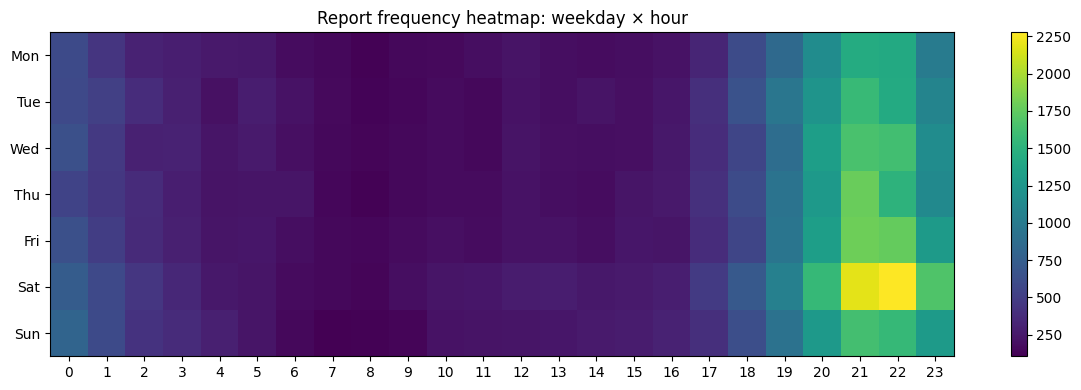

In [55]:
tmp = df.dropna(subset=["hour","weekday"])
pivot = pd.pivot_table(tmp, values="datetime_raw", index="weekday", columns="hour", aggfunc="count", fill_value=0)

plt.figure(figsize=(12,4))
plt.imshow(pivot, aspect="auto")
plt.colorbar()
plt.yticks(range(7), ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xticks(range(24), range(24), rotation=0)
plt.title("Report frequency heatmap: weekday × hour")
plt.tight_layout()
plt.show()


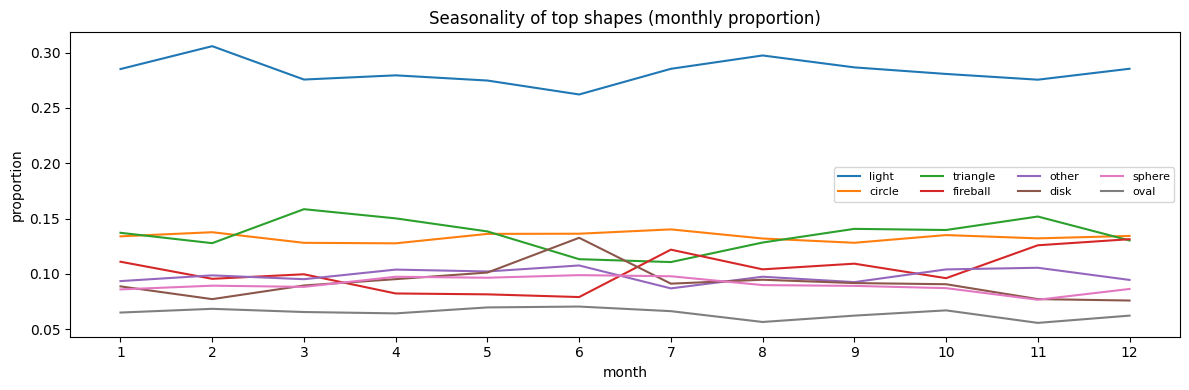

In [56]:
tmp = df.dropna(subset=["shape","month"])
shape_month = pd.crosstab(tmp["month"], tmp["shape"])
top_shapes = tmp["shape"].value_counts().head(8).index
shape_month_top = shape_month[top_shapes]

shape_month_top_prop = shape_month_top.div(shape_month_top.sum(axis=1), axis=0)

plt.figure(figsize=(12,4))
for col in shape_month_top_prop.columns:
    plt.plot(shape_month_top_prop.index, shape_month_top_prop[col], label=col)
plt.title("Seasonality of top shapes (monthly proportion)")
plt.xlabel("month")
plt.ylabel("proportion")
plt.xticks(range(1,13))
plt.legend(ncol=4, fontsize=8)
plt.tight_layout()
plt.show()


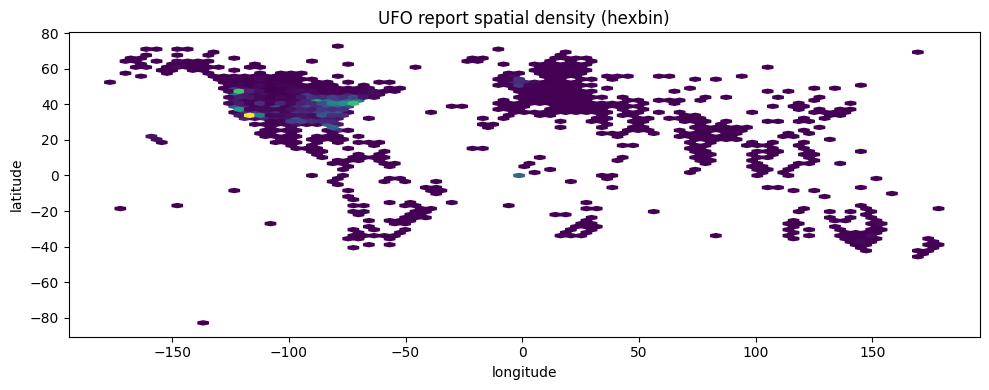

In [57]:
geo = df[~df["geo_invalid"]].copy()

plt.figure(figsize=(10,4))
plt.hexbin(geo["longitude_num"], geo["latitude_num"], gridsize=80, mincnt=1)
plt.title("UFO report spatial density (hexbin)")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.tight_layout()
plt.show()


In [58]:
geo_small = geo.dropna(subset=["latitude_num","longitude_num"]).copy()

# DBSCAN in degrees is approximate; eps ~ 0.5 degrees ≈ 50km at mid-latitudes.
X = geo_small[["latitude_num","longitude_num"]].to_numpy()

clust = DBSCAN(eps=0.5, min_samples=40).fit(X)
geo_small["cluster"] = clust.labels_

n_clusters = (geo_small["cluster"] >= 0).sum()
print("Clustered points:", n_clusters, "out of", len(geo_small))
print("Number of clusters (excluding -1):", geo_small.loc[geo_small["cluster"]>=0, "cluster"].nunique())

# Top clusters
cluster_sizes = geo_small[geo_small["cluster"]>=0]["cluster"].value_counts().head(10)
cluster_sizes


Clustered points: 78452 out of 87180
Number of clusters (excluding -1): 71


cluster
3     37092
4     10249
6      6248
0      4256
12     4092
9      2388
1      2199
5      1419
7      1387
17     1043
Name: count, dtype: int64

In [59]:
clusters = geo_small[geo_small["cluster"]>=0].copy()

summary = (clusters
           .groupby("cluster")
           .agg(
               n=("cluster","size"),
               lat_center=("latitude_num","mean"),
               lon_center=("longitude_num","mean"),
               top_shape=("shape", lambda s: s.value_counts(dropna=True).head(1).index[0] if s.notna().any() else np.nan)
           )
           .sort_values("n", ascending=False)
           .head(10)
          )
summary


,n,lat_center,lon_center,top_shape
cluster,,,,
3,37092,39.854554,-80.976294,light
4,10249,35.698367,-119.451131,light
6,6248,46.738932,-122.363707,light
0,4256,31.041167,-94.646507,light
12,4092,27.695212,-81.336624,light
9,2388,33.393534,-111.801217,light
1,2199,52.383384,-1.288475,light
5,1419,0.000000,0.000000,light
7,1387,39.662307,-105.042635,light


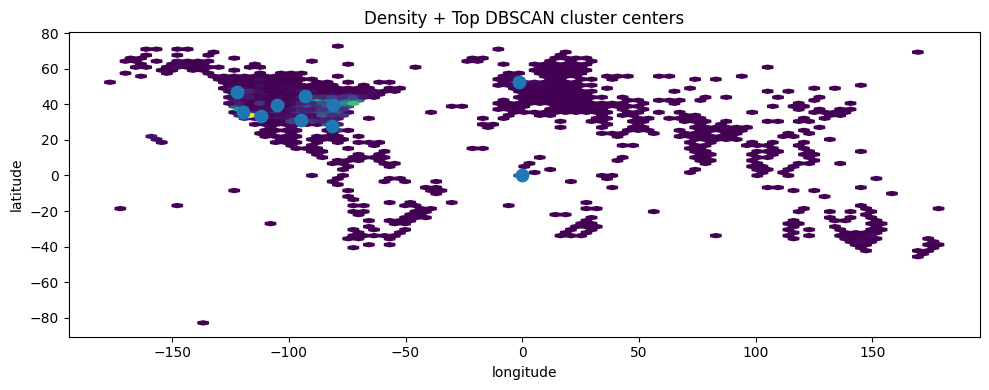

In [60]:
plt.figure(figsize=(10,4))
plt.hexbin(geo["longitude_num"], geo["latitude_num"], gridsize=80, mincnt=1)
plt.scatter(summary["lon_center"], summary["lat_center"], s=80)
plt.title("Density + Top DBSCAN cluster centers")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.tight_layout()
plt.show()


In [61]:
txt = df["comments"].fillna("")

df["comment_len"] = txt.str.len()
df["word_count"] = txt.str.split().apply(len)
df["exclaim_rate"] = txt.str.count("!") / (df["comment_len"].replace(0, np.nan))
df["caps_ratio"] = txt.apply(lambda s: sum(ch.isupper() for ch in s) / max(1, len(s)))

df[["comment_len","word_count","exclaim_rate","caps_ratio"]].describe(percentiles=[.5,.9,.95,.99])


,comment_len,word_count,exclaim_rate,caps_ratio
count,87180.000000,87180.000000,87147.0,87180.000000
mean,83.082748,14.095114,0.0,0.061124
std,39.321349,7.356277,0.0,0.127416
min,0.000000,0.000000,0.0,0.000000
50%,79.000000,13.000000,0.0,0.025000
90%,137.000000,25.000000,0.0,0.121212
95%,141.000000,27.000000,0.0,0.177215
99%,147.000000,30.000000,0.0,0.800000
max,246.000000,35.000000,0.0,1.000000


In [62]:
# Basic cleaning
documents = df["comments"].fillna("").astype(str)

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    min_df=25,      # adjust up/down depending on noise
    max_df=0.6,
    ngram_range=(1,2),
    token_pattern=r"(?u)\b[a-zA-Z]{3,}\b"
)

X = vectorizer.fit_transform(documents)

n_topics = 10
nmf = NMF(n_components=n_topics, random_state=0)
W = nmf.fit_transform(X)
H = nmf.components_

terms = np.array(vectorizer.get_feature_names_out())

def top_terms_for_topic(topic_idx, n=12):
    weights = H[topic_idx]
    top_ids = np.argsort(weights)[::-1][:n]
    return list(zip(terms[top_ids], weights[top_ids]))

for k in range(n_topics):
    print(f"\nTopic {k}:")
    print(top_terms_for_topic(k, n=12))



Topic 0:
[('lights', np.float64(7.234336885654567)), ('red', np.float64(1.9532862827885011)), ('red lights', np.float64(1.3873314163485067)), ('white lights', np.float64(1.0193397141872411)), ('bright lights', np.float64(1.0066961933778793)), ('lights sky', np.float64(0.9658904525773072)), ('white', np.float64(0.8965024112831894)), ('flashing', np.float64(0.8498843489174553)), ('formation', np.float64(0.8492504798137265)), ('orange lights', np.float64(0.707402436304682)), ('triangle', np.float64(0.6445006112382801)), ('flashing lights', np.float64(0.605351955501379))]

Topic 1:
[('light', np.float64(3.0539617439690336)), ('bright', np.float64(1.9322006356880952)), ('bright light', np.float64(1.2097636725733336)), ('white', np.float64(0.898153592055939)), ('white light', np.float64(0.7196112894122717)), ('bright white', np.float64(0.5070978190794425)), ('red', np.float64(0.4006533682034332)), ('light sky', np.float64(0.36281310029485353)), ('red light', np.float64(0.3501750485937382)),

In [63]:
df["topic_id"] = W.argmax(axis=1)
df["topic_strength"] = W.max(axis=1)

df[["topic_id","topic_strength"]].describe()
df["topic_id"].value_counts().head(10)


topic_id
1    14016
3    13651
8    13603
4     9863
6     8351
9     8176
0     6632
2     6043
7     4308
5     2537
Name: count, dtype: int64

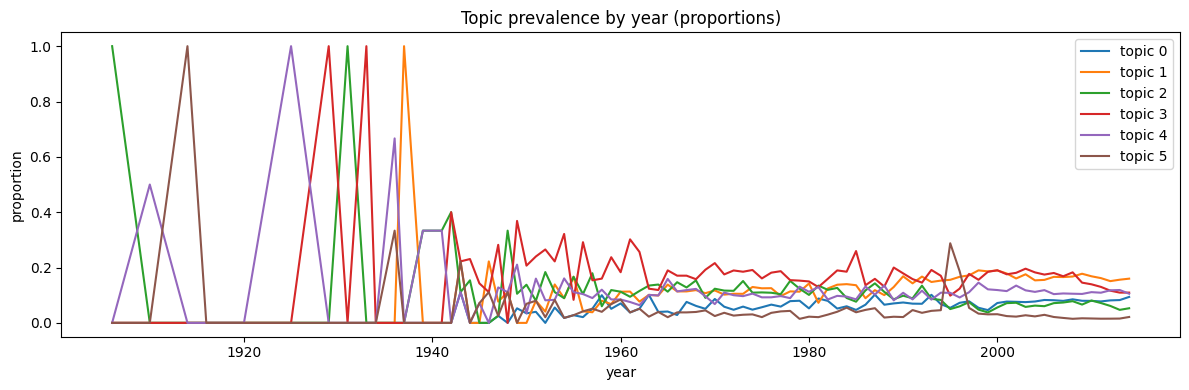

In [64]:
tmp = df.dropna(subset=["year"])
topic_year = pd.crosstab(tmp["year"], tmp["topic_id"])
topic_year = topic_year.div(topic_year.sum(axis=1), axis=0)

plt.figure(figsize=(12,4))
for t in range(min(n_topics, 6)):  # plot top 6 topic lines
    plt.plot(topic_year.index, topic_year[t], label=f"topic {t}")
plt.title("Topic prevalence by year (proportions)")
plt.xlabel("year")
plt.ylabel("proportion")
plt.legend()
plt.tight_layout()
plt.show()


In [65]:
from numpy.random import default_rng
rng = default_rng(0)

# Choose a report with decent text length
candidates = df.index[df["comment_len"] > 200].to_numpy()
seed_idx = int(rng.choice(candidates))

sims = cosine_similarity(X[seed_idx], X).ravel()
nn = np.argsort(sims)[::-1][1:6]  # top 5 excluding itself

print("Seed report:\n", df.loc[seed_idx, "comments"][:500], "\n---")
for i in nn:
    print(f"\nNeighbor sim={sims[i]:.3f} | shape={df.loc[i,'shape']} | city={df.loc[i,'city']} | datetime={df.loc[i,'datetime']}")
    print(df.loc[i, "comments"][:400])


Seed report:
 A cigar shaped ufo was hovering over the mississippi river then went straight up and was gone. WOW&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33&#33 
---

Neighbor sim=0.425 | shape=cigar | city=little rock | datetime=2012-12-03 17:00:00
Cigar shaped light bulbs in the sky.

Neighbor sim=0.367 | shape=formation | city=north america&#44 bermuda | datetime=1998-02-21 18:00:00
Not sure what to make of it

Neighbor sim=0.367 | shape=light | city=san diego | datetime=2014-01-06 19:00:00
White round light&#44 high in northwest sky. Brighter than Jupiter. Slowly shrank to the size of satellite&#44 then moved to the northwest.

Neighbor sim=0.351 | shape=triangle | city=winnamac | datetime=2005-10-01 19:00:00
orange triangular shape that turned on and off two times

Neighbor sim=0.337 | shape=disk | city=uk/england | datetime=2007-07-05 17:08:00
X1 - UO captured on film at 420th of a

In [66]:
from scipy.stats import chi2_contingency

tmp = df.dropna(subset=["shape","month"])
top_shapes = tmp["shape"].value_counts().head(10).index
ct = pd.crosstab(tmp.loc[tmp["shape"].isin(top_shapes), "month"],
                 tmp.loc[tmp["shape"].isin(top_shapes), "shape"])

chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-square:", chi2, "p-value:", p, "dof:", dof)


Chi-square: 622.3130455113601 p-value: 8.152776540833218e-77 dof: 99


Kruskal-Wallis stat: 430.60038594696505 p-value: 6.492287282917937e-89


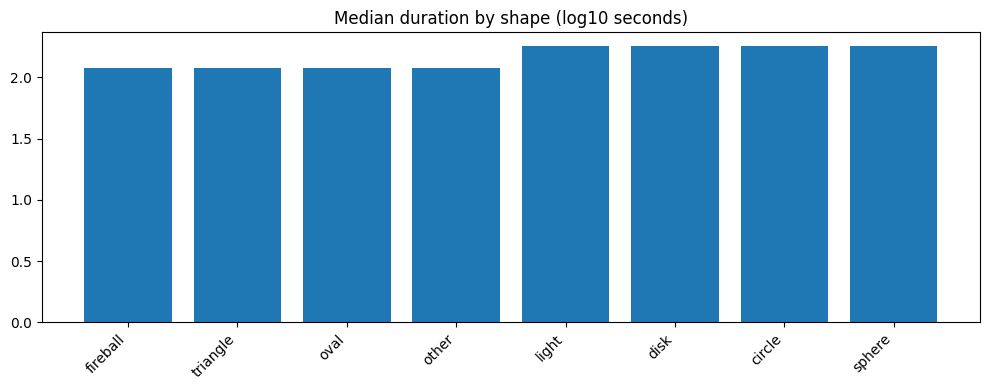

In [67]:
from scipy.stats import kruskal

tmp = df.dropna(subset=["shape","duration_seconds_num"])
top_shapes = tmp["shape"].value_counts().head(8).index

groups = [tmp.loc[tmp["shape"]==s, "duration_seconds_num"].values for s in top_shapes]
stat, p = kruskal(*groups)
print("Kruskal-Wallis stat:", stat, "p-value:", p)

# Visualize median durations (log scale is clearer)
med = tmp[tmp["shape"].isin(top_shapes)].groupby("shape")["duration_seconds_num"].median().sort_values()
plt.figure(figsize=(10,4))
plt.bar(med.index, np.log10(med.values))
plt.title("Median duration by shape (log10 seconds)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [68]:
features = df[[
    "duration_seconds_num","comment_len","word_count",
    "latitude_num","longitude_num","hour","month","year"
]].copy()

features = features.replace([np.inf, -np.inf], np.nan)
features = features.dropna()

Xf = StandardScaler().fit_transform(features)

iso = IsolationForest(n_estimators=300, contamination=0.01, random_state=0)
scores = -iso.fit_predict(Xf)  # 1 normal, -1 anomaly → invert style if you prefer
anom = iso.decision_function(Xf)  # higher = more normal

features["anomaly_score"] = anom
out = features.sort_values("anomaly_score").head(15).index

cols_show = ["datetime_raw","datetime","city","state","country","shape","duration_seconds_num","comments"]
df.loc[out, cols_show].head(10)


,datetime_raw,datetime,city,state,country,shape,duration_seconds_num,comments
11940,1944-01-01 10:00:00,1944-01-01 10:00:00,wilderness (near western md),wv,NaN,disk,1814400.0,US fighter planes shoot down pre Roswell UFO t...
11942,1944-01-01 12:00:00,1944-01-01 12:00:00,wilderness,wv,NaN,disk,1814400.0,Two related reports of possible predecessor to...
29478,1942-02-15 11:00:00,1942-02-15 11:00:00,panama city (panama),NaN,NaN,disk,172800.0,THIS HAPPENED TWO OR THREE MONTHS AFTER PEARL ...
49742,2013-05-28 00:00:00,2013-05-28 00:00:00,tamborine mountain (australia),NaN,NaN,light,259200.0,Light/Orb in private rainforest every night fo...
2498,1947-10-16 12:00:00,1947-10-16 12:00:00,pereira (colombia),NaN,NaN,circle,43200.0,Arriving in the town of Periera in the middle ...
41694,2004-04-18 12:34:00,2004-04-18 12:34:00,sydney (nsw&#44 australia),NaN,au,light,86400.0,It was a bright object in the air&#44 like a s...
27201,2004-01-04 19:30:00,2004-01-04 19:30:00,queensland (qld&#44 australia),NaN,NaN,light,36000.0,have it on tape
33919,1973-03-01 10:30:00,1973-03-01 10:30:00,upper hutt (new zealand),NaN,NaN,circle,9000.0,The Object hung silently above our Town for al...
9793,2013-11-12 21:30:00,2013-11-12 21:30:00,mount isa (australia),NaN,au,sphere,1209600.0,Orange orb over mount Isa. ((NUFORC Note: Po...
53951,1956-06-15 02:00:00,1956-06-15 02:00:00,tripoli (libya),NaN,NaN,light,172800.0,Lights in sky (mars brightness) seen several n...


In [70]:
import numpy as np
import pandas as pd
#Test 1
def test_to_float_seconds_parses_messy_duration_strings():
    # This test assumes your notebook already defined to_float_seconds exactly as written.
    # If not, this will raise NameError (which is a useful signal you didn't run the EDA cell).
    cases = [
        ("300", 300.0),
        ("300 seconds", 300.0),
        ("1,200", 1200.0),
        ("30.5", 30.5),
        ("about 45 mins", 45.0),     # extracts first number
        ("-12", -12.0),              # parser preserves sign; later EDA flags negative invalid
        (None, np.nan),
        ("", np.nan),
        ("unknown", np.nan),
        ("N/A", np.nan),
    ]

    for raw, expected in cases:
        got = to_float_seconds(raw)
        if pd.isna(expected):
            assert pd.isna(got), f"Expected NaN for {raw!r}, got {got}"
        else:
            assert got == expected, f"Expected {expected} for {raw!r}, got {got}"

#Test 2
def test_datetime_parsing_and_derived_time_features_match_notebook_logic():
    df = pd.DataFrame({
        "datetime": ["1/1/2010 23:30", "2012-06-15 08:00", "not a date"],
        "date posted": ["1/2/2010", "2012-06-20", "bad posted"],
    })

    # --- Exact notebook logic ---
    df["datetime_raw"] = df["datetime"]
    df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce", infer_datetime_format=True)
    df["date posted"] = pd.to_datetime(df["date posted"], errors="coerce", infer_datetime_format=True)

    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["hour"] = df["datetime"].dt.hour
    df["weekday"] = df["datetime"].dt.weekday
    df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)
    # --- End exact notebook logic ---

    # Row 0 should parse (this format is extremely common and stable)
    assert pd.notna(df.loc[0, "datetime"])
    assert df.loc[0, "year"] == 2010
    assert df.loc[0, "hour"] == 23

    # Row 2 should not parse
    assert pd.isna(df.loc[2, "datetime"])
    assert pd.isna(df.loc[2, "year"])
    assert pd.isna(df.loc[2, "weekday"])

    # Weekend flag must be logically consistent wherever weekday is present
    ok = df["weekday"].notna()
    assert (df.loc[ok, "is_weekend"] == df.loc[ok, "weekday"].isin([5, 6]).astype(int)).all()

    # Optional: prove coercion works as intended (some values parse, some may not)
    # i.e., code does not crash and produces a datetime column with dtype datetime64[ns] or similar
    assert "datetime" in df.columns
    
test_to_float_seconds_parses_messy_duration_strings()
test_datetime_parsing_and_derived_time_features_match_notebook_logic()

/tmp/job.280502/ipykernel_648667/1055053121.py:36: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce", infer_datetime_format=True)
/tmp/job.280502/ipykernel_648667/1055053121.py:37: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date posted"] = pd.to_datetime(df["date posted"], errors="coerce", infer_datetime_format=True)


chatgpt could've:
1. made the topic prevalence graph easier to read by changing the y axis to a logarithmic scale. There is quite a large difference between topic frequencies in the early 1900s and the 1950s and beyond
2. The graph of the world is neat, but hard to read. Would've been nice to have some kind of border lines to separate countries
3. I notice that chatgpt does not explicitly check for independence when running the kruskal wallis test. Should've checked for independence, if the shapes were not independent then shouldn't run the kruskal wallis test. 

# 7.
* Now, give screenshots of your code output back to the AI tool, and ask it to interpret the results for you, e.g., *Here are the results, interpret.* Paste the interpretation it provides here.
* What do you agree with?
* What do you disagree with?


## 8.

* Propose and implement 1-2 concrete next steps for your EDA (e.g., better deduplication with fuzzy text, geospatial clustering, normalization of duration text, timezone handling, creation of dummy variables, visualization of a different column, etc.) to improve your understanding of the data, pretending that you are going to use this dataset for important downstream tasks later.
* Interpret your results: what did you learn about the dataset?

I'm going to visualize the duration (seconds) column to see what the distribution of durations looks like:

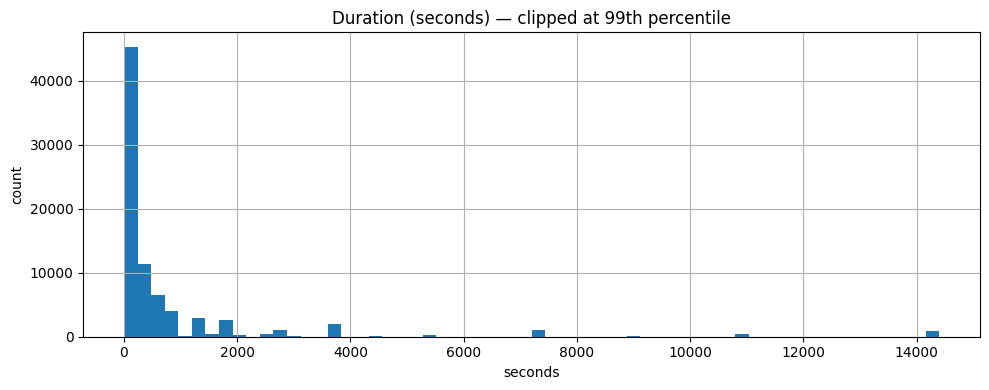

In [74]:
cap = dur.quantile(0.99)
dur = ufo_fe["duration (seconds)"]
plt.figure(figsize=(10,4))
dur.clip(upper=cap).hist(bins=60)
plt.title("Duration (seconds) — clipped at 99th percentile")
plt.xlabel("seconds")
plt.ylabel("count")
plt.tight_layout()
plt.show()

I want to see if there is any relation between duration and the year, so I will graph duration on y axis and year on the x axis

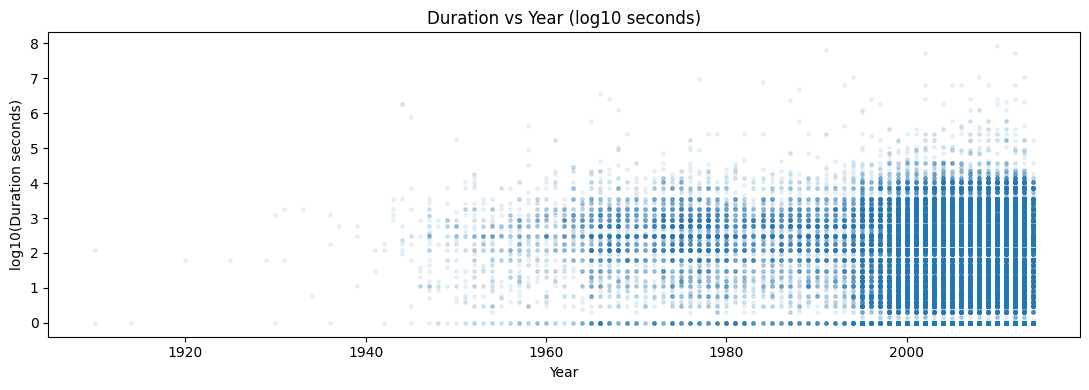

In [77]:
plt.figure(figsize=(11,4))
plt.scatter(ufo_fe["year"], ufo_fe["duration_log10"], s=6, alpha=0.08)
plt.title("Duration vs Year (log10 seconds)")
plt.xlabel("Year")
plt.ylabel("log10(Duration seconds)")
plt.tight_layout()
plt.show()

From the above, I've learned that duration is heavily right skewed, and I've learned that it doesn't seem like there is much of a correlation between duration and year. As the years progress, duration tends to remain about the same

# C [30pts]. Interview Questions

We now pretend this is a real job interview. Here's some guidance on how to answer these questions:

1. Briefly restate the question and state any assumptions you are making.

2. Explain your reasoning out loud, focusing on tradeoffs, limitations, and constraints.

3. As a principle, keep your answers as short and clear as they can be (while still answering the question).

4. Write/speak in a conversational but professional tone (avoid being overly formal). For speaking: speak at a reasonable pace and volume, speak clearly, pause when you need to, and practice making "eye contact" with the camera. Keep a confident, positive, and professional tone. *For additional coaching and practice, the University Writing Center provides individual appointments: https://writingcenter.tamu.edu/make-an-appointment.*

There may not be a single correct answer. We are grading whether your reasoning is reasonable and aware of limitations.

These questions are written unless a video response is specified.


**Rubric**

[6pt] Clear understanding of the question; reasonable assumptions; thoughtful reasoning that acknowledges tradeoffs and limitations; clear, concise communication in a conversational but professional tone (for speaking: clear pace, volume, and articulation).

[3pt] Basic understanding but shallow reasoning or unclear assumptions; communication is somewhat unclear, overly verbose, or overly informal/formal.

[0pt] Minimal, unclear, or incorrect response; poor communication or unprofessional tone.

## 1.
When should you use `pandas` versus just read in a csv?

You should use pandas when you are doing any kind of high performance data analysis. Python is very slow since it is interpreted, libraries like pandas have c++ subroutines that run much more quickly than if you were to try and create your own dataframe operations in python.  
In general you shouldn't try to re-invent the wheel.

## 2.
If this dataset suddenly grew by 10000×, which parts of your analysis pipeline would fail first? (Hint: Consider your hardware constraints.)

If this dataset suddently grew by 10,000x, the new size of the dataset would be 10^5 * 15 MB = 1500 GB.  
First of all, I'm pretty sure that reading the csv would fail because my main memory is only 371 GB, thus the dataset would not fit in main memory and slurm would probably give me OOM error and kill my job.  
Since the dataset doesn't fit in main memory, all of the other steps in my pipeline would fail as well.  
If i am restricted to only 371 GB of RAM, then we could instead read the data in chunks, maybe load 300 GB worth of data in each iteration and combine results in the end.  
Ideally though, we could just use more nodes, in this case i would probably only need 6 nodes (6 * 371 = 2226 GB).  
I would use OpenMPI to do this, and I would probably switch to C++ to possibly reduce cost (compute time = money)

## 3.
Assume some fraction of reports are adversarially fabricated (meaning: someone submitted fake UFO reports on purpose). How does that change your analysis?

We would have to dedicate some of our analysis to detecting these fake UFO reports.  
First I would assume that these fake UFO reports were sent to flood our database with incorrect data, so in all likelihood these UFO reports were automatically generated by an algorithm.  
With this assumption we could reasonably assume that these automatically generated records have some pattern, whether it be similar durations, similar report times, similar locations, etc. or the columns following the same random distribution.  
We could then look at the overall distributions of each column and try to detect bi-modal distributions, as it is unlikely the attacker's false records follow the same distribution as our real data.   
We could then attempt to remove this fake data by looking at these bi-modal distributions and removing the points that belong to the smaller of the two distributions, assuming that our real data greatly outnumbers the fake data.

## 4.
How would incorrect timezone handling distort downstream statistical conclusions?

Incorrect timezone handling would mean that the report times for each sighting would be inconsistent. An example of where this could go wrong is if you are bucketing by report time. So if you are trying to compare the sighting duration for the time 22:00 on a specific date the sighting duration for the time 23:00 on a specific date, your results will be incorrect because in some places 22:00 could have actually been 23:00 and vice versa due to timezone differences. 

## 5.
Now, link to a video (1 min. max) of yourself answering the following question: What kind of selection bias do you think is present in this web-based UFO dataset?

Make sure to end on a follow-up question for the interviewer -- e.g., *So, to get some more context, are you thinking about this for a Speech AI application like Siri?*

https://youtu.be/dviACu0haz4

# D [2pts]. What new questions do you have?
We want you to think bigger! Tell us what questions and curiosity this homework brings up for you.

**Rubric**

[2pt] Complete, thoughtful response.

[1pt] Partial response.

[0pt] Minimal response.

# 1.
What new questions do you have about data cleaning and exploratory data analysis (in general) after this homework? Or, what topics are you curious about now? List at least 3.

In production how is testing carried out? What are the methods used for testing, how do they know they've written good enough tests (asides from just code coverage)

Why use Python for data mining tasks specifically? 

Is there a standard template for performing EDA? Like is there a standard set of steps that data miners generally follow for performing EDA?